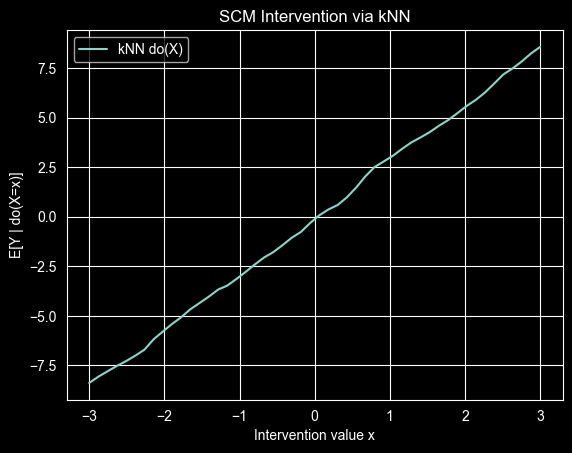

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# ---------- Data ----------
np.random.seed(0)
n = 1000
Z = np.random.normal(0, 1, n)
X = 2 * Z + np.random.normal(0, 1, n)
Y = 3 * X + Z + np.random.normal(0, 1, n)

# ---------- kNN do-intervention ----------
def knn_do(Z, X, Y, x0, k=20):
    features = np.column_stack([Z, X])
    query = np.column_stack([Z, np.full_like(Z, x0)])

    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(features)

    _, idx = knn.kneighbors(query)
    return Y[idx].mean()

# ---------- Sweep over x0 ----------
x_vals = np.linspace(-3, 3, 50)
y_do = [knn_do(Z, X, Y, x0) for x0 in x_vals]

# ---------- Plot ----------
plt.figure()
plt.plot(x_vals, y_do, label="kNN do(X)")
plt.xlabel("Intervention value x")
plt.ylabel("E[Y | do(X=x)]")
plt.title("SCM Intervention via kNN")
plt.legend()
plt.show()


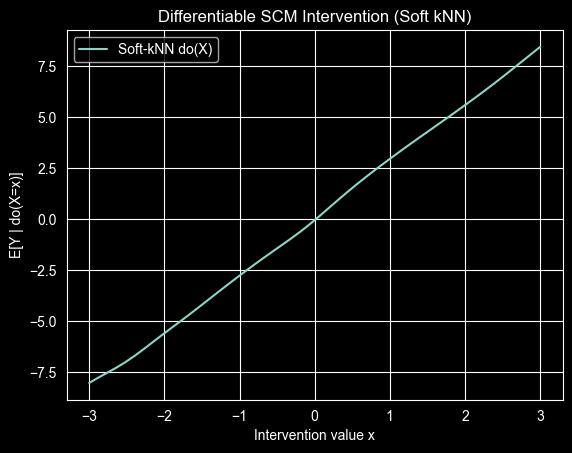

In [2]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(0)

# ---------- Data ----------
n = 1000
Z = torch.randn(n, 1)
X = 2 * Z + torch.randn(n, 1)
Y = 3 * X + Z + torch.randn(n, 1)

# ---------- Pairwise distance ----------
def pairwise_sq_dist(a, b):
    a2 = (a ** 2).sum(dim=1, keepdim=True)
    b2 = (b ** 2).sum(dim=1, keepdim=True).T
    return a2 + b2 - 2 * a @ b.T

# ---------- Soft kNN do-intervention ----------
def soft_knn_do(Z, X, Y, x0, temperature=0.3):
    data = torch.cat([Z, X], dim=1)
    query = torch.cat([Z, torch.full_like(X, x0)], dim=1)

    dists = pairwise_sq_dist(query, data)
    weights = torch.softmax(-dists / temperature, dim=1)

    return (weights @ Y).mean()

# ---------- Sweep ----------
x_vals = torch.linspace(-3, 3, 50)
y_do = []

for x0 in x_vals:
    y_do.append(soft_knn_do(Z, X, Y, x0).item())

# ---------- Plot ----------
plt.figure()
plt.plot(x_vals.numpy(), y_do, label="Soft-kNN do(X)")
plt.xlabel("Intervention value x")
plt.ylabel("E[Y | do(X=x)]")
plt.title("Differentiable SCM Intervention (Soft kNN)")
plt.legend()
plt.show()
